Pokemon Win Prediction Analysis

In [10]:
import pandas as pd

1.Data Preparation

In [11]:
# Chargement des fichiers CSV
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")

In [12]:
# Aperçu rapide pour vérifier
print(pokemon_df.head())

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  


In [13]:
print(combats_df.head())

   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


In [14]:
# Corriger le nom manquant du Pokémon #62
pokemon_df.loc[pokemon_df["#"] == 62, "Name"] = "Primeape"

In [15]:
# Vérification rapide
print(pokemon_df[pokemon_df["#"] == 62])

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
61  62  Primeape  Fighting    NaN  40      80       35       35       45   

    Speed  Generation  Legendary  
61     70           1      False  


In [16]:
# Remplacer les NaN dans Type 2 par "None"
pokemon_df["Type 2"].fillna("None", inplace=True)

<ipython-input-16-79a0f68ee91d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df["Type 2"].fillna("None", inplace=True)


In [17]:
# Vérification rapide
print(pokemon_df["Type 2"].value_counts())

Type 2
None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64


 Étapes pour fusionner : rappel pd.merge(df1, df2, left_on='col1', right_on='col2', how='inner')

In [18]:
# 1.Renommer les colonnes pour mieux suivre
# On fait une copie pour éviter les confusions
combats = combats_df.copy()

In [19]:
# On va renommer les colonnes pour fusionner plus facilement
combats.rename(columns={
    "First_pokemon": "Pokemon1_ID",
    "Second_pokemon": "Pokemon2_ID",
    "Winner": "Winner_ID"
}, inplace=True)

In [20]:
# 2.Fusion avec les infos de Pokemon1
combats = combats.merge(
    pokemon_df,
    left_on="Pokemon1_ID",
    right_on="#",
    how="left",
    suffixes=('', '_1')
)

In [21]:
# Fusion avec les infos de Pokemon2
combats = combats.merge(
    pokemon_df,
    left_on="Pokemon2_ID",
    right_on="#",
    how="left",
    suffixes=('', '_2')
)


In [22]:
print (combats.head())

   Pokemon1_ID  Pokemon2_ID  Winner_ID    #      Name Type 1    Type 2  HP  \
0          266          298        298  266  Larvitar   Rock    Ground  50   
1          702          701        701  702  Virizion  Grass  Fighting  91   
2          191          668        668  191   Togetic  Fairy    Flying  55   
3          237          683        683  237    Slugma   Fire      None  40   
4          151          231        151  151   Omastar   Rock     Water  70   

   Attack  Defense  ...  Type 1_2  Type 2_2  HP_2  Attack_2  Defense_2  \
0      64       50  ...     Grass      Dark    70        70         40   
1      90       72  ...      Rock  Fighting    91       129         90   
2      40       85  ...   Psychic      None    75        75         75   
3      40       40  ...    Dragon      None    77       120         90   
4      60      125  ...       Bug      Rock    20        10        230   

   Sp. Atk_2 Sp. Def_2 Speed_2 Generation_2  Legendary_2  
0         60        40     

In [23]:
# Renommer les colonnes pour mieux comprendre
combats.rename(columns={
    "#": "ID_1",
    "Name": "Name_1",
    "Type 1": "Type1_1",
    "Type 2": "Type2_1",
    "#_2": "ID_2",
    "Name_2": "Name_2",
    "Type 1_2": "Type1_2",
    "Type 2_2": "Type2_2",
}, inplace=True)

In [24]:
#  Vérifier les doublons éventuels
print(combats.duplicated().sum())  # Nombre de lignes en double

1952


In [25]:
# Supprimer si besoin
combats.drop_duplicates(inplace=True)

In [26]:
# Calculate each Pokemon’s win percentage using the combat data.
# GroupBy + ValueCounts :
# Compter le nombre de victoires par Pokémon
win_counts = combats["Winner_ID"].value_counts()

In [27]:
# Compter le nombre total de combats par Pokémon
battle_counts = combats["Pokemon1_ID"].value_counts() + combats["Pokemon2_ID"].value_counts()

In [28]:
print (battle_counts)

1      126
2      114
3      125
4      120
5      109
      ... 
796    101
797    125
798    113
799    140
800    116
Name: count, Length: 784, dtype: int64


Calculer le pourcentage de victoires

In [29]:
# Créer un DataFrame à partir des deux séries
win_rate_df = pd.DataFrame({
    "#": battle_counts.index,
    "Total_Battles": battle_counts.values,
    "Wins": win_counts.reindex(battle_counts.index, fill_value=0).values
})

In [30]:
# Calcul du pourcentage
win_rate_df["Win_Percentage"] = (win_rate_df["Wins"] / win_rate_df["Total_Battles"]) * 100

In [31]:
print (win_rate_df)

       #  Total_Battles  Wins  Win_Percentage
0      1            126    34       26.984127
1      2            114    41       35.964912
2      3            125    83       66.400000
3      4            120    67       55.833333
4      5            109    53       48.623853
..   ...            ...   ...             ...
779  796            101    39       38.613861
780  797            125   110       88.000000
781  798            113    59       52.212389
782  799            140    86       61.428571
783  800            116    71       61.206897

[784 rows x 4 columns]


In [32]:
print(win_rate_df.to_string(index=False))

  #  Total_Battles  Wins  Win_Percentage
  1            126    34       26.984127
  2            114    41       35.964912
  3            125    83       66.400000
  4            120    67       55.833333
  5            109    53       48.623853
  6            115    62       53.913043
  7            129   113       87.596899
  8            132   112       84.848485
  9            129   109       84.496124
 10            114    18       15.789474
 11            135    55       40.740741
 13            136    77       56.617647
 14            104    15       14.423077
 15            124    13       10.483871
 16            114    70       61.403509
 17            106    25       23.584906
 18            126    17       13.492063
 19            120    73       60.833333
 20            117   113       96.581197
 21            123    46       37.398374
 22            114    61       53.508772
 23            127   109       85.826772
 24            121   114       94.214876
 25            1

In [33]:
win_rate_df.reset_index(drop=True, inplace=True)

In [34]:
print(win_rate_df)

       #  Total_Battles  Wins  Win_Percentage
0      1            126    34       26.984127
1      2            114    41       35.964912
2      3            125    83       66.400000
3      4            120    67       55.833333
4      5            109    53       48.623853
..   ...            ...   ...             ...
779  796            101    39       38.613861
780  797            125   110       88.000000
781  798            113    59       52.212389
782  799            140    86       61.428571
783  800            116    71       61.206897

[784 rows x 4 columns]


Joindre ce win rate au dataset principal pokemon_df

In [35]:
pokemon_df = pd.merge(pokemon_df, win_rate_df[["#", "Win_Percentage"]], on="#", how="left")

In [36]:
pokemon_df["Win_Percentage"] = pokemon_df["Win_Percentage"].fillna(0)

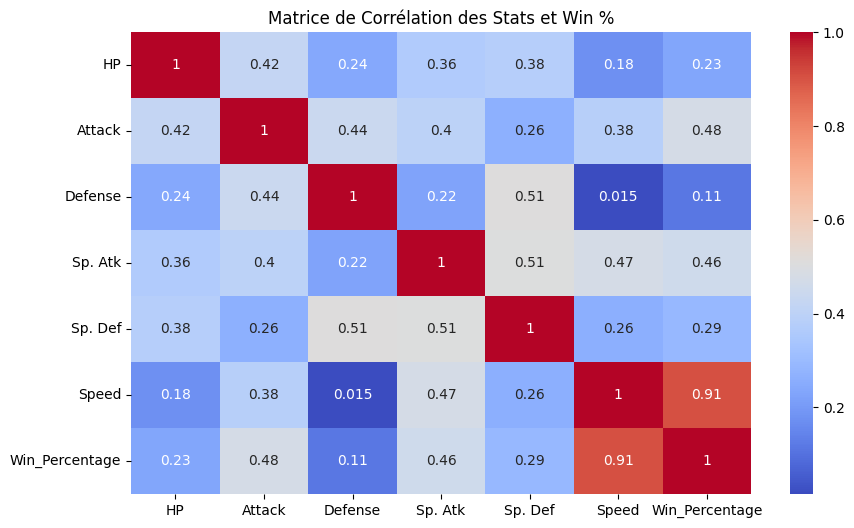

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques pertinentes
stats_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Win_Percentage"]
corr_matrix = pokemon_df[stats_cols].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation des Stats et Win %")
plt.show()

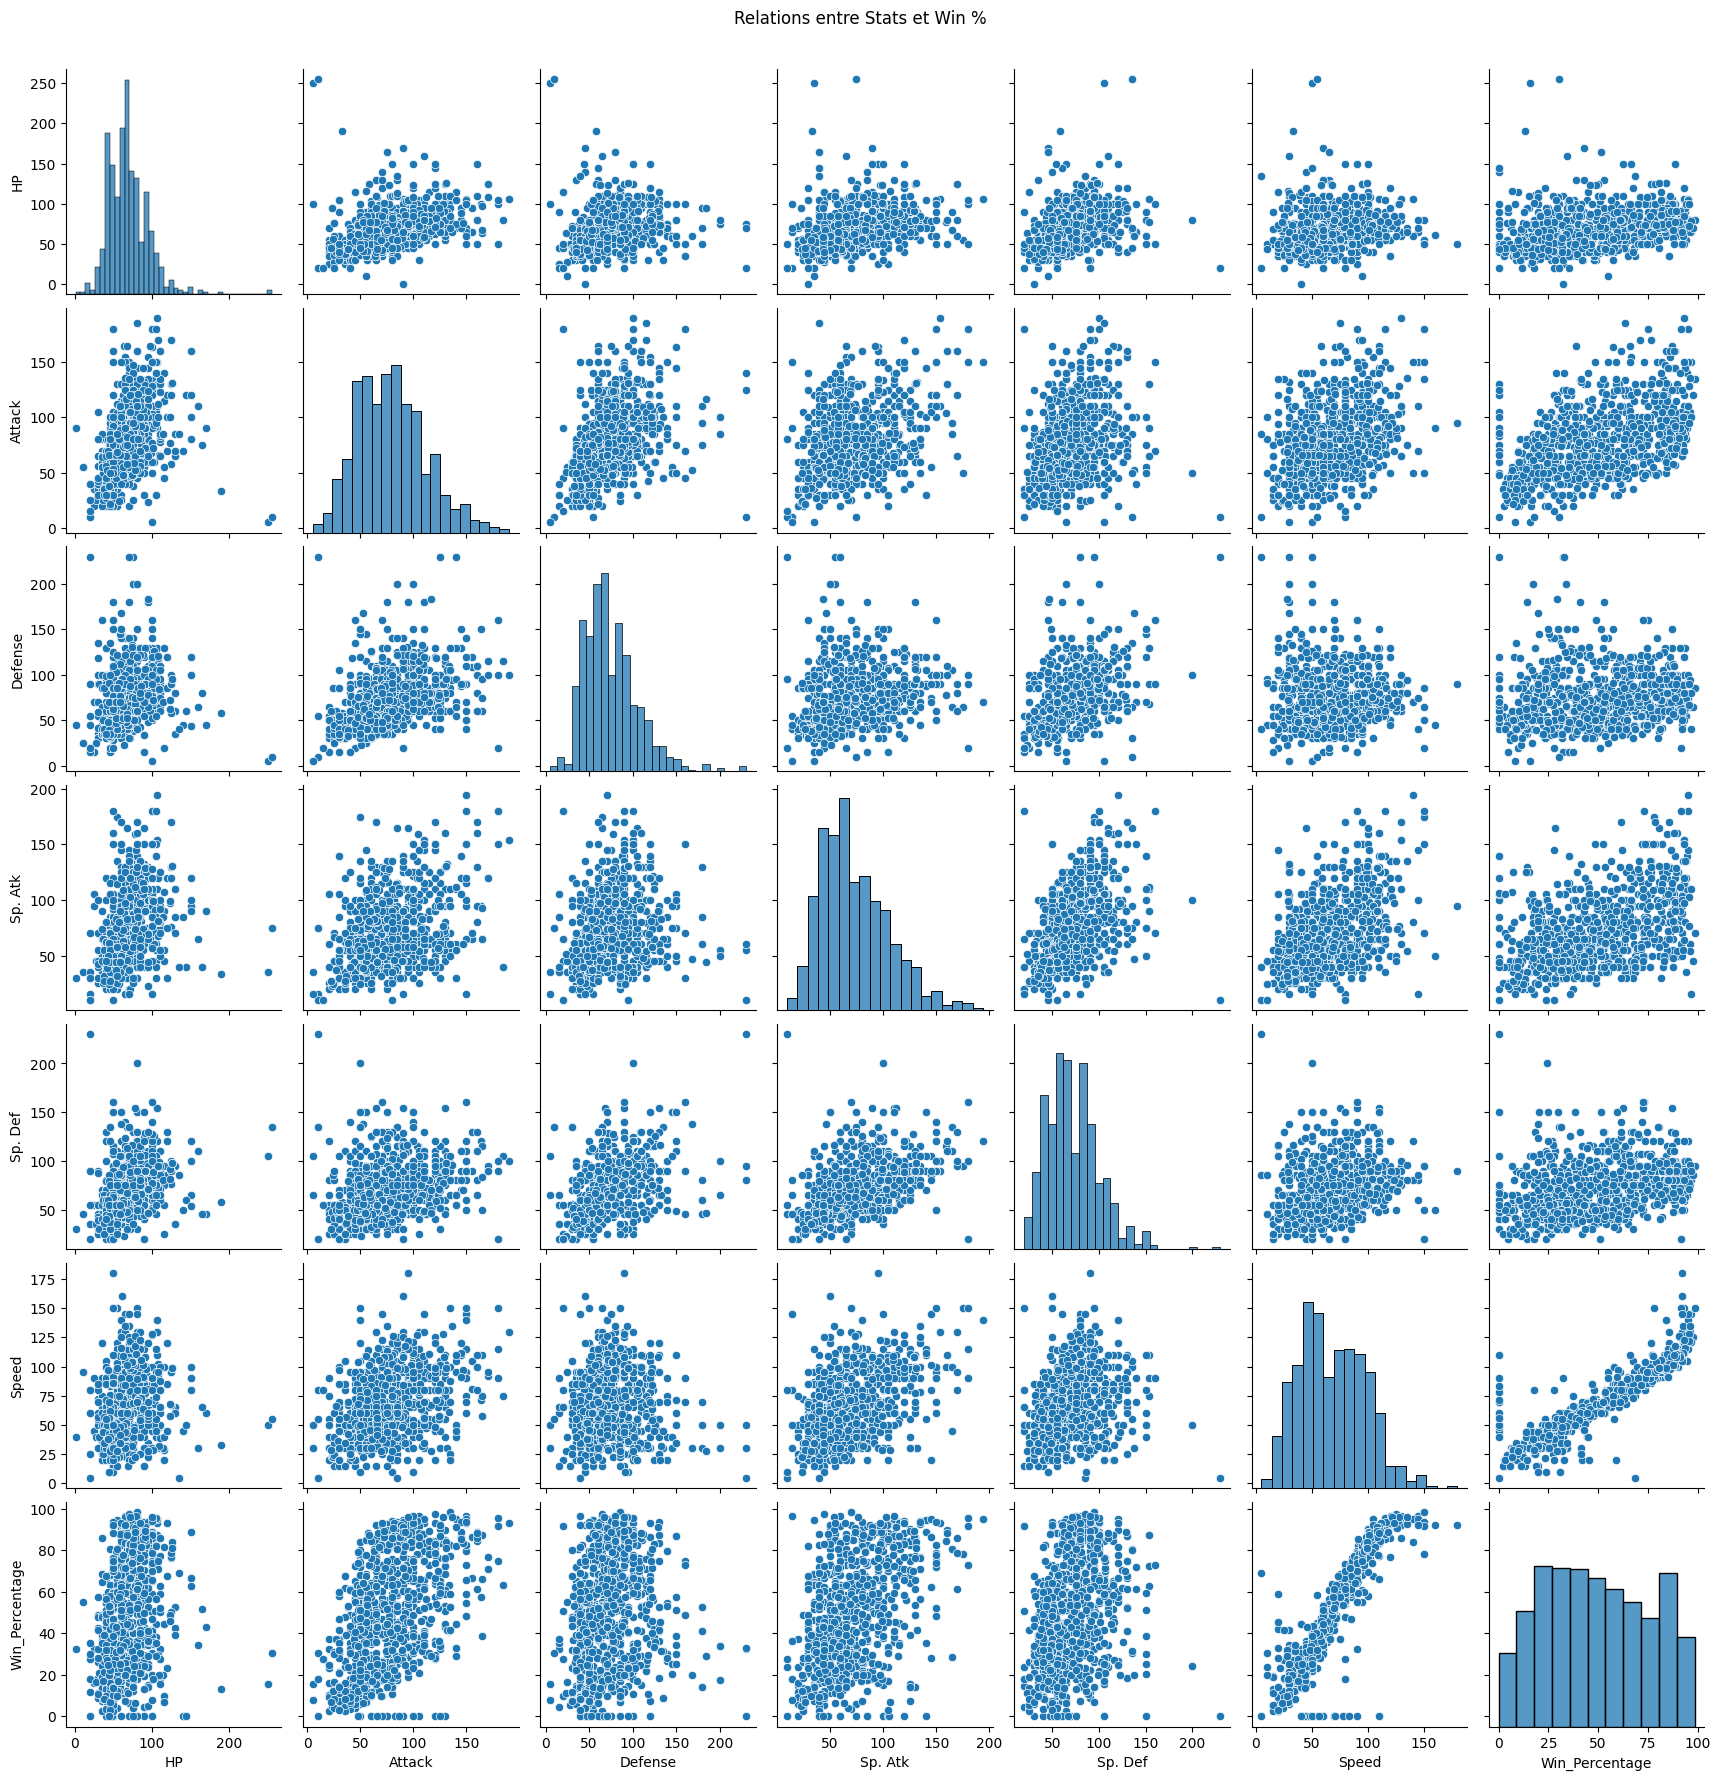

In [38]:
# Pairplot pour visualiser
sns.pairplot(pokemon_df[stats_cols])
plt.suptitle("Relations entre Stats et Win %", y=1.02)
plt.show()

In [39]:
# Analyse des 10 meilleurs Pokémon
top10 = pokemon_df.sort_values(by="Win_Percentage", ascending=False).head(10)

# Affichage des stats
print(top10[["Name", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Win_Percentage"]])

                         Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
154           Mega Aerodactyl   80     135       85       70       95    150   
512                   Weavile   70     120       65       45       85    125   
703    Tornadus Therian Forme   79     100       80      110       90    121   
19              Mega Beedrill   65     150       40       15       80    145   
153                Aerodactyl   80     105       65       60       75    130   
476              Mega Lopunny   65     136       94       54       96    135   
726                  Greninja   72      95       67      103       71    122   
716  Meloetta Pirouette Forme  100     128       90       77       77    128   
426             Mega Rayquaza  105     180      100      180      100    115   
164             Mega Mewtwo Y  106     150       70      194      120    140   

     Win_Percentage  
154       98.387097  
512       97.413793  
703       96.610169  
19        96.581197  
153      

Machine Learning

In [40]:
# 1.Préparer les données
# Split data into training/testing sets (80/20 split)
from sklearn.model_selection import train_test_split

# Variables explicatives (features)
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# X = entrées (caractéristiques), y = sortie (valeur à prédire)
X = pokemon_df[features]
y = pokemon_df["Win_Percentage"]


In [41]:
# Séparation en training (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 2.Entraîner 3 modèles de régression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [43]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [44]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [45]:
!pip install xgboost  # à exécuter une fois dans Colab si nécessaire

In [46]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [47]:
# 3 : Comparer avec la MAE
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_preds))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_preds))
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_preds))

Linear Regression MAE: 6.45994763705404
Random Forest MAE: 5.676000272620145
XGBoost MAE: 6.418235496369415
